In [2]:
import keras
import numpy as np
from keras.applications import vgg16
 
#Load the VGG16 model
vgg_model = vgg16.VGG16(weights='imagenet')

Using TensorFlow backend.


PIL image size (224, 224)


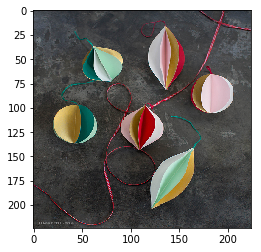

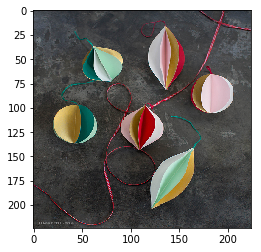

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


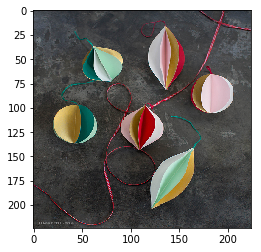

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
filename = 'C:/diy/3D_Paper_Ornaments_2.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [4]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print(label)

[[('n03944341', 'pinwheel', 0.29706576), ('n02834397', 'bib', 0.14922653), ('n03929660', 'pick', 0.12343537), ('n03938244', 'pillow', 0.12141986), ('n04548362', 'wallet', 0.035836916)]]


In [5]:
layers = vgg_model.layers
outputs = [layer.output for layer in vgg_model.layers]

print(len(layers))

23


In [8]:
print(outputs[22].shape)

(?, 1000)


In [15]:
print(outputs[22])
print(layers[22].name)

Tensor("predictions/Softmax:0", shape=(?, 1000), dtype=float32)
predictions


In [19]:
from keras.models import Model

layer_name = 'fc2' # can be predictions 
intermediate_layer_model = Model(inputs=vgg_model.input,
                                 outputs=vgg_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(processed_image)

In [21]:
print(np.max(intermediate_output))

14.365904


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')